<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_tree_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"> 
    <img src="https://raw.githubusercontent.com/klajosw/python/master/kl_mie_python_logo_250.jpg" 
         align="left" width="251" height="251">
    
</p>


<p> </p>



# Python gráfok, hálózatok

<https://klajosw.blogspot.com/>


---

---

## ETE csomag

---

In [ ]:
## installálás ha kell
!pip install ete3

In [ ]:
%matplotlib inline
from ete3 import Tree, TreeStyle
from IPython.display import Image

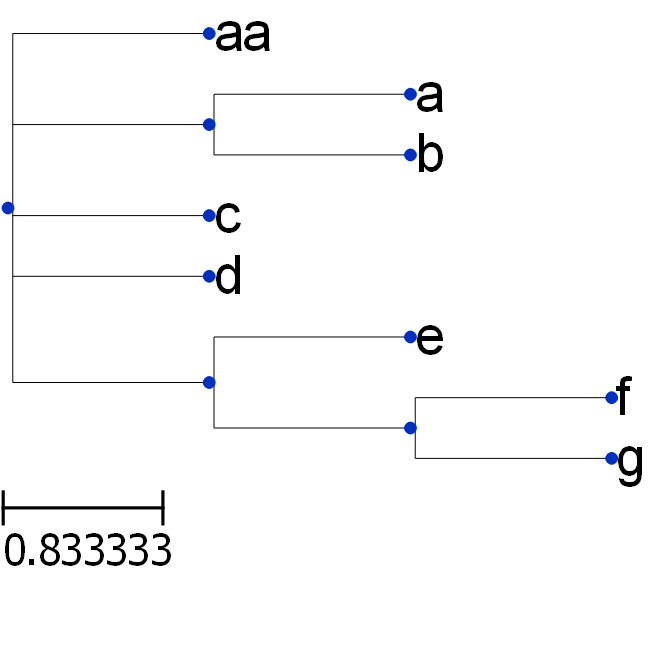

In [ ]:
t = Tree( "(aa, (a,b),c, d, (e, (f, g)) );" )
# t.show()  ## megjelenítés külön ablakban 
t.render("kltree1.png", w=183, units="mm")  ## fa állományba mentése
Image('kltree1.png')                        ## megjelenítés

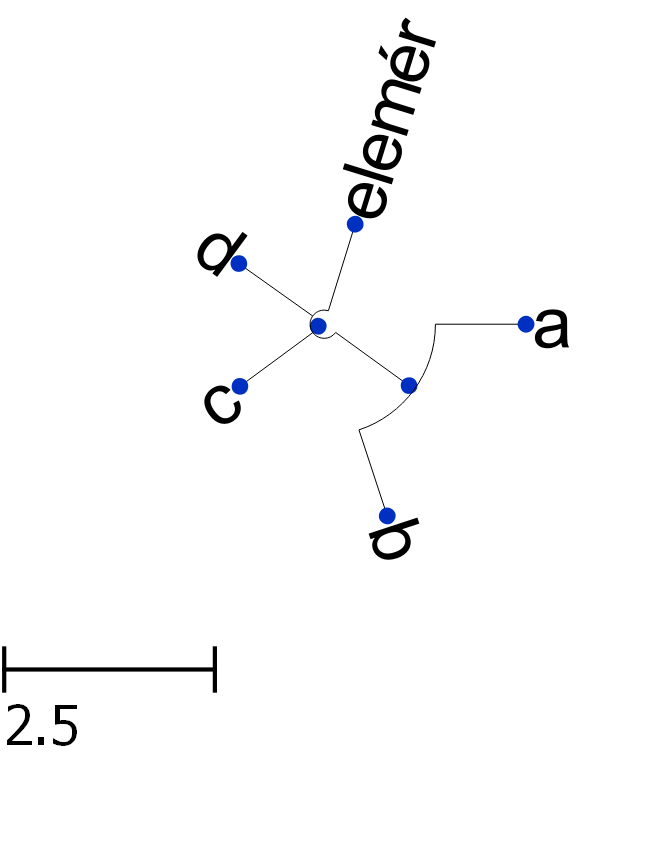

In [ ]:
t = Tree( "((a,b),c,d,  elemér);" )
circular_style = TreeStyle()
circular_style.mode = "c" # draw tree in circular mode
circular_style.scale = 20
# t.show()  ## megjelenítés külön ablakban 
t.render("kltree2.png", w=183, units="mm", tree_style=circular_style) ## mentés
Image('kltree2.png')                                                  ## megjelenítés

---

## networkx csomag 

`import matplotlib.pyplot as plt`

`import networkx as nx`

---

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

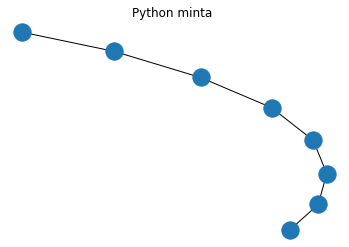

In [ ]:
## egyszerű vonal
plt.title("Python minta ")
G = nx.path_graph(8)
nx.draw(G)
plt.show()

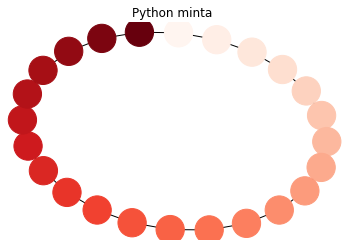

In [ ]:
## körgyűrű színátmenettel
plt.title("Python minta ")
G = nx.cycle_graph(24)
pos = nx.spring_layout(G, iterations=200)
nx.draw(G, pos, node_color=range(24), node_size=800, cmap=plt.cm.Reds)
plt.show()

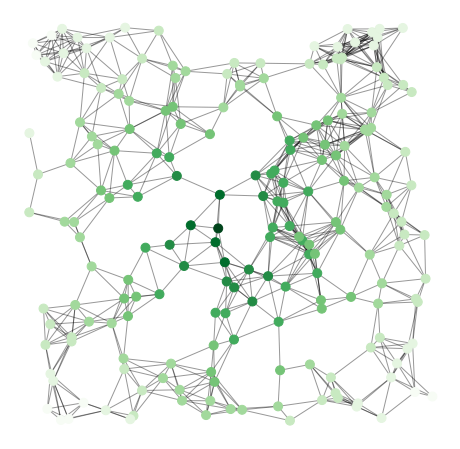

In [ ]:

G = nx.random_geometric_graph(200, 0.125)
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, 'pos')

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5)**2 + (y - 0.5)**2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))

plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(G, pos, nodelist=list(p.keys()),
                       node_size=80,
                       node_color=list(p.values()),
                       cmap=plt.cm.Greens_r)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis('off')
plt.show()

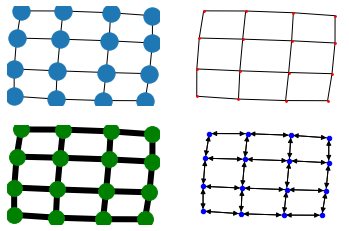

In [ ]:
## 4x4 es rács

G = nx.grid_2d_graph(4, 4)  # 4x4 grid

pos = nx.spring_layout(G, iterations=100)

plt.subplot(221)
nx.draw(G, pos, font_size=8)

plt.subplot(222)
nx.draw(G, pos, node_color='r', node_size=3, with_labels=False)

plt.subplot(223)
nx.draw(G, pos, node_color='g', node_size=250, with_labels=False, width=6)

plt.subplot(224)
H = G.to_directed()
nx.draw(H, pos, node_color='b', node_size=20, with_labels=False)

plt.show()

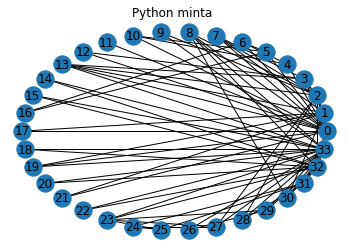

In [ ]:
## gyűrüs hálózat
plt.title("Python minta ")
G = nx.karate_club_graph()
nx.draw_circular(G, with_labels=True)
plt.show()

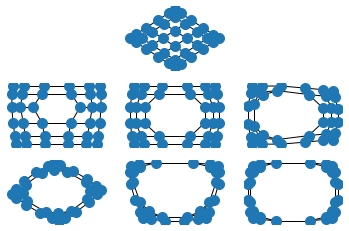

In [ ]:
## torzítások
import matplotlib.pyplot as plt
import networkx as nx


options = {
    'node_color': 'C0',
    'node_size': 100,
}

G = nx.grid_2d_graph(6, 6)
plt.subplot(332)
nx.draw_spectral(G, **options)

G.remove_edge((2, 2), (2, 3))
plt.subplot(334)
nx.draw_spectral(G, **options)

G.remove_edge((3, 2), (3, 3))
plt.subplot(335)
nx.draw_spectral(G, **options)

G.remove_edge((2, 2), (3, 2))
plt.subplot(336)
nx.draw_spectral(G, **options)

G.remove_edge((2, 3), (3, 3))
plt.subplot(337)
nx.draw_spectral(G, **options)

G.remove_edge((1, 2), (1, 3))
plt.subplot(338)
nx.draw_spectral(G, **options)

G.remove_edge((4, 2), (4, 3))
plt.subplot(339)
nx.draw_spectral(G, **options)

plt.show()

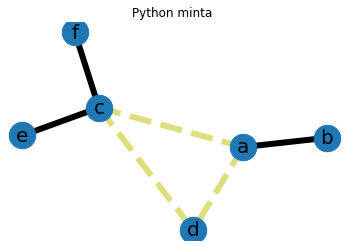

In [ ]:
## súlytényező
plt.title("Python minta ")
G = nx.Graph()

G.add_edge('a', 'b', weight=0.6)
G.add_edge('a', 'c', weight=0.2)
G.add_edge('c', 'd', weight=0.1)
G.add_edge('c', 'e', weight=0.7)
G.add_edge('c', 'f', weight=0.9)
G.add_edge('a', 'd', weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(G) 

# pontok
nx.draw_networkx_nodes(G, pos, node_size=700)

# élek
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='y', style='dashed')

# cimkék
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

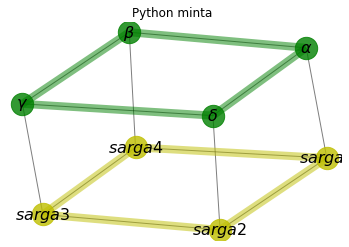

In [ ]:
plt.title("Python minta ")
G = nx.cubical_graph()
pos = nx.spring_layout(G)  # pozició

# pontok
nx.draw_networkx_nodes(G, pos,
                       nodelist=[0, 1, 2, 3],
                       node_color='y',
                       node_size=500,
                       alpha=0.8)
nx.draw_networkx_nodes(G, pos,
                       nodelist=[4, 5, 6, 7],
                       node_color='g',
                       node_size=500,
                       alpha=0.8)

# élek
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_edges(G, pos,
                       edgelist=[(0, 1), (1, 2), (2, 3), (3, 0)],
                       width=8, alpha=0.5, edge_color='y')
nx.draw_networkx_edges(G, pos,
                       edgelist=[(4, 5), (5, 6), (6, 7), (7, 4)],
                       width=8, alpha=0.5, edge_color='g')


# cimkék
labels = {}
labels[0] = r'$sarga1$'
labels[1] = r'$sarga2$'
labels[2] = r'$sarga3$'
labels[3] = r'$sarga4$'
labels[4] = r'$\alpha$'
labels[5] = r'$\beta$'
labels[6] = r'$\gamma$'
labels[7] = r'$\delta$'
nx.draw_networkx_labels(G, pos, labels, font_size=16)

plt.axis('off')
plt.show()

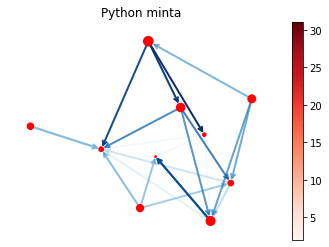

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
plt.title("Python minta")

G = nx.generators.directed.random_k_out_graph(10, 3, 0.5)
pos = nx.layout.spring_layout(G)

node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='red')
edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, arrowstyle='->',
                               arrowsize=10, edge_color=edge_colors,
                               edge_cmap=plt.cm.Blues, width=2)
#  alpha érték
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.Reds)
pc.set_array(edge_colors)
plt.colorbar(pc)

ax = plt.gca()
ax.set_axis_off()
plt.show()

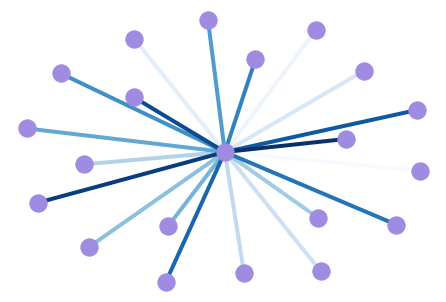

In [ ]:
G = nx.star_graph(20)
pos = nx.spring_layout(G)
colors = range(20)
nx.draw(G, pos, node_color='#A08BE2', edge_color=colors,
        width=4, edge_cmap=plt.cm.Blues, with_labels=False)
plt.show()

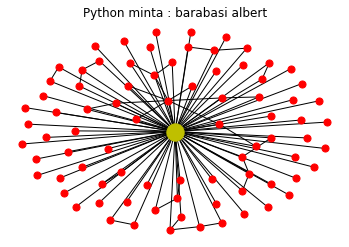

In [ ]:
from operator import itemgetter

import matplotlib.pyplot as plt
import networkx as nx
plt.title("Python minta : barabasi albert")
if 1 == 1:

    n = 1000
    m = 2
    G = nx.generators.barabasi_albert_graph(n, m)
    # find node with largest degree
    node_and_degree = G.degree()
    (largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]
    # Create ego graph of main hub
    hub_ego = nx.ego_graph(G, largest_hub)
    # Draw graph
    pos = nx.spring_layout(hub_ego)
    nx.draw(hub_ego, pos, node_color='r', node_size=50, with_labels=False)

    nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=300, node_color='y')
    plt.show()

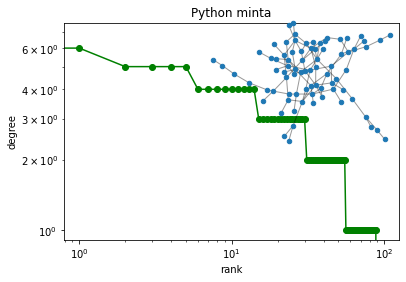

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.gnp_random_graph(100, 0.02)

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
dmax = max(degree_sequence)

plt.loglog(degree_sequence, 'g-', marker='o')
plt.title("Python minta")
plt.ylabel("degree")
plt.xlabel("rank")


plt.axes([0.45, 0.45, 0.45, 0.45])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc, pos, node_size=20)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)

plt.show()

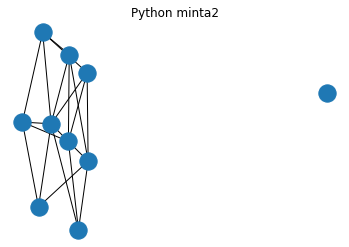

In [ ]:
import matplotlib.pyplot as plt
from networkx import nx

plt.title("Python minta2")
n = 10  # 10 pontok
m = 20  # 20 élek

G = nx.gnm_random_graph(n, m)
### Erdos Renyi

nx.draw(G)
plt.show()